<a href="https://colab.research.google.com/github/TovarischComrad/Tehnopark/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# data = [[x1, y1], [x2, y2], ..., [xn, yn]]
# labels = [c1, c2, ..., cn]

N = 50
k = 5
data, labels = make_blobs(n_samples=N, centers=k, random_state=0)
print(data[:10])
print(labels[:10])

[[ 1.28933778  3.44969159]
 [-2.11905292  7.25661035]
 [-0.51916521  7.96444293]
 [ 1.12031365  5.75806083]
 [ 1.7373078   4.42546234]
 [ 1.84070628  3.56162231]
 [-2.43420238  2.96982766]
 [-2.3400503   1.19159966]
 [ 3.2855582   2.10004351]
 [ 9.48153019 -1.35453059]]
[0 3 3 0 0 0 2 2 1 4]


`lst = [elem cycle condition]`

In [27]:
N = 5
lst = [i for i in range(N) if i % 2 == 0]
lst

[0, 2, 4]

In [22]:
lst = []
N = 10
for i in range(N):
    lst.append(0)

[0, 1, 2, 3, 4]

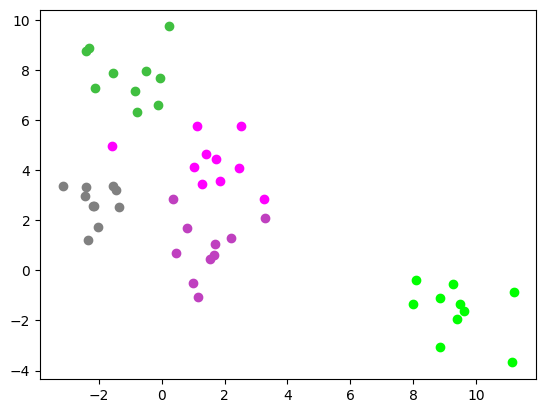

In [77]:
plot(data, labels, k)

In [72]:
def plot(data, labels, k):
    X = [data[labels==i, 0] for i in range(k)]
    Y = [data[labels==i, 1] for i in range(k)]
    C = np.linspace(0, 1, k)
    for i in range(k):
      plt.scatter(X[i], Y[i], color=(C[k - i - 1], C[i], C[k - i - 1]))

In [3]:
def plot_c(data, labels, xc1, yc1, xc2,  yc2):
    x1 = data[labels==0, 0]
    x2 = data[labels==1, 0]
    y1 = data[labels==0, 1]
    y2 = data[labels==1, 1]
    plt.scatter(x1, y1, color='lightcoral')
    plt.scatter(x2, y2, color='lime')
    plt.scatter(xc1, yc1, color='red')
    plt.scatter(xc2, yc2, color='green')

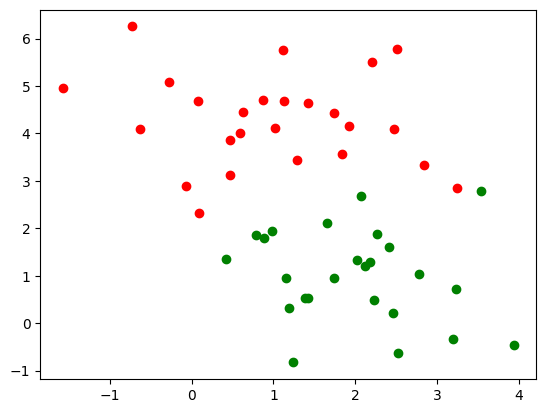

In [4]:
plot(data, labels)

In [5]:
import numpy as np

clusters = np.zeros(N)
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

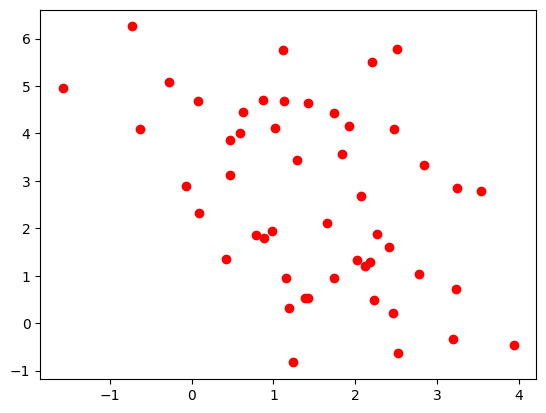

In [6]:
plot(data, clusters)

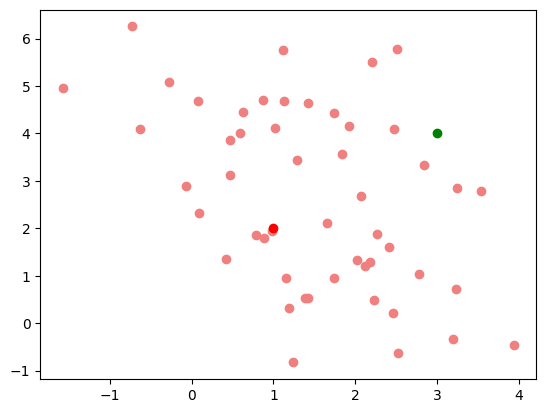

In [7]:
plot_c(data, clusters, 1, 2, 3, 4)

In [8]:
import random

i1 = random.randint(1, N)
i2 = random.randint(1, N)

xc1, yc1 = data[i1][0], data[i1][1]
xc2, yc2 = data[i2][0], data[i2][1]

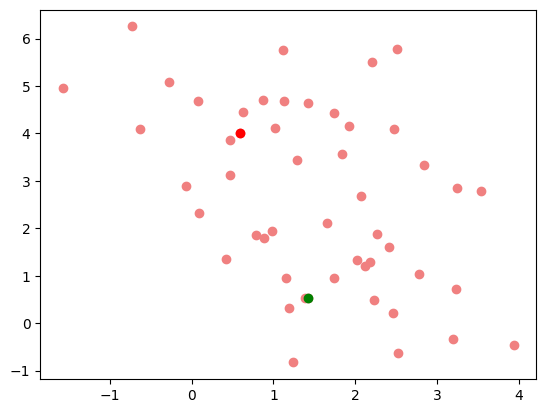

In [9]:
plot_c(data, clusters, xc1, yc1, xc2, yc2)

In [56]:
import math

def dist(x1, y1, x2, y2):
  return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [11]:
dist(1, 2, 3, 4)

2.8284271247461903

In [46]:
lst = [12, 3,4, 2, 2, 1]
lst.index(4)

2

In [49]:
c = (1, 2, 3)
c[0]

1

In [73]:
def new_clusters(data, clusters, center):
    k = len(center) # [[x1, y1], [x2, y2], ..., [xk, yk]]
    for i in range(len(data)):
        p = data[i]
        distance = [dist(p[0], p[1], center[j][0], center[j][1]) for j in range(k)]
        mn = min(distance)
        i_mn = distance.index(mn)
        clusters[i] = i_mn
    return clusters

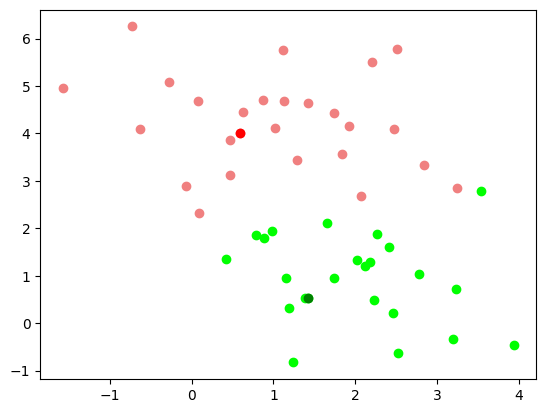

In [13]:
cl2 = new_clusters(data, clusters, xc1, yc1, xc2, yc2)
plot_c(data, cl2, xc1, yc1, xc2, yc2)

In [78]:
def update_centers(data, clusters, k):
    X = [data[clusters==i, 0] for i in range(k)]
    Y = [data[clusters==i, 1] for i in range(k)]

    Xc = [np.average(X[i]) for i in range(k)] # [x1, x2, ..., xk]
    Yc = [np.average(Y[i]) for i in range(k)] # [y1, y2, ..., yk]
    centers = [[Xc[i], Yc[i]] for i in range(k)]

    return centers

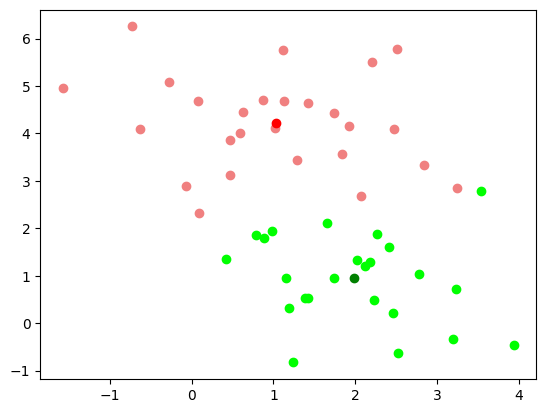

In [15]:
a, b, c, d = update_centers(data, cl2)
plot_c(data, cl2, a,  b, c, d)

In [75]:
def clusterization(data, max_iter, k):
    N = len(data)
    clusters = np.zeros(N)

    # Шаг 1. Случайный выбор центров
    num = [random.randint(1, N - 1) for i in range(k)]
    centers = [[data[num[i]][0], data[num[i]][1]] for i in range(k)]

    # Шаг 2. Итеративное обновление
    for i in range(max_iter):

      # Шаг 2.1 Определение новых кластеров
      clusters = new_clusters(data, clusters, centers)

      # Шаг 2.2 Определение новых центров
      centers = update_centers(data, clusters, k)

    return clusters

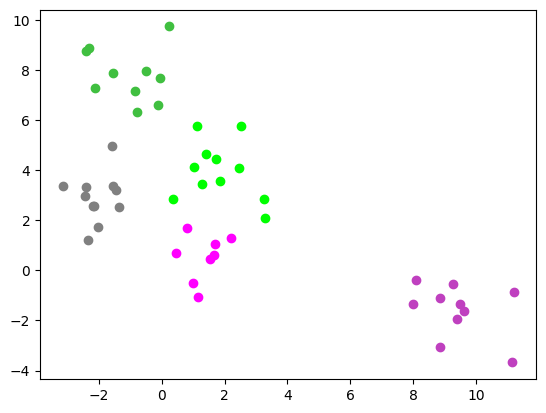

In [79]:
result = clusterization(data, N, k)
plot(data, result, k)

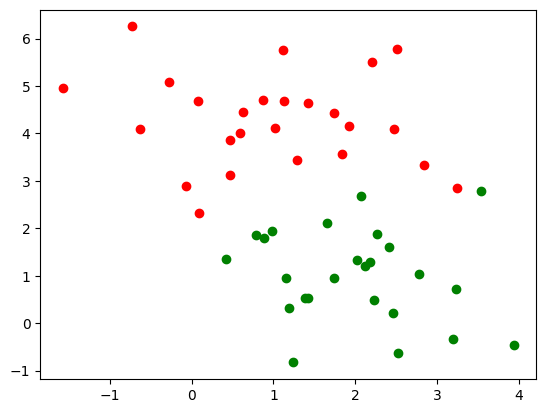

In [18]:
plot(data, labels)

In [19]:
data

array([[ 0.9845149 ,  1.95211539],
       [ 1.65209057,  2.12010873],
       [ 1.7373078 ,  4.42546234],
       [ 2.47034915,  4.09862906],
       [ 2.12178474,  1.20013556],
       [ 3.19466821, -0.33716216],
       [ 3.93841822, -0.4500954 ],
       [ 2.06576754,  2.68353415],
       [ 2.02708529,  1.32599553],
       [-0.73000011,  6.25456272],
       [ 2.20656076,  5.50616718],
       [-0.27652528,  5.08127768],
       [ 1.1312175 ,  4.68194985],
       [ 1.18447037,  0.318814  ],
       [ 1.84070628,  3.56162231],
       [ 1.28933778,  3.44969159],
       [ 0.58894326,  4.00148458],
       [ 2.45760916,  0.21285357],
       [ 0.08848433,  2.32299086],
       [ 0.87305123,  4.71438583],
       [ 1.42094543,  0.53492249],
       [ 2.41163392,  1.60423683],
       [ 1.14796916,  0.94960906],
       [ 1.38280707,  0.5381105 ],
       [ 2.78435808,  1.02664657],
       [ 3.2460247 ,  2.84942165],
       [ 0.4666179 ,  3.86571303],
       [-1.57671974,  4.95740592],
       [ 2.23269366,

In [20]:
result

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.])